In [6]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
\def\dt{\D t}
\def\C{{\mathbb C}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqfor{\qquad\hbox{for}\qquad}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

Office Hours: 3-4pm Mondays, Huxley 6M40
<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Lecture 14: Logarithmic singular integrals

1. Logarithmic kernels
    - Solving a logarithmic singular integral equation
    - Evaluating logarithmic singular integrals
2. Application: electrostatic potentials in 2D
    - Potential arising from a point charge and a single plate
    
The motivation behind this lecture is to calculate electrostatic potentials. An example is the Faraday cage: imagine a series of metal plates connected together so that they have the same charge. If configured to surround a region, this configuration will shield the interior from an external charge:

![Faradaycage](Laplacetangentialplot.jpg)

Here, the coloured lines are equipotential lines, and there is a point source at $x = 2$, which corresponds to a forcing of 
$$\log\| (x,y)  - (2,0) \| = \log|z - 2|$$
where  $z = x + \I y$. 

## Logarithmic singular integrals

From the Green's function of the Laplacian, it is natural to consider logarithmic singular integrals, and we focus yet again on $[-1,1]$:

$$v(z) = {1 \over \pi }\int_{-1}^1 f(t) \log | z - t| \dt$$

Note that off $[-1,1]$, $v(z)$ solves Laplace's equation, and is continuous on $[-1,1]$:

In [2]:
t = Fun()
f = sqrt(1-t^2)*exp(t)
v = z -> logkernel(f, z)  # logkernel(f,z) calculates 1/π * \int f(t)*log|t-z| dt

xx = yy = linspace(-2.,2., 100)
V = v.(xx' .+ im*yy)

contour(xx, yy, V)
plot!(domain(t); color=:black, label="contour")

In [3]:
surface(xx, yy, V)

Continuity follows since $\log|x-t|$ is integrable for $-1 \leq x \leq 1$ provided $f(t)$ has weaker than pole singularities. 

For $z \notin (-\infty,1]$ this can also be seen since $v$ is the real part of an analytic function:
$$
    v(z) = \Re \int_{-1}^1 f(t) \log ( z - t) \dt
$$
Note that the integrand avoids the branch cut of $\log z$. To extend this to $z\in (-\infty,-1]$ (or more generally, $z \notin [-1,\infty)$), we can use the alternative expression
$$
    v(z) = \Re \int_{-1}^1 f(t) \log (t-z) \dt
$$
which follows from $\log|z-t| = \log|t-z|$.

In [4]:
z = 2.0 +3.0im
@show v(z)
@show sum(f*log(abs(z-t)))/π
@show sum(f*log(z-t))/π
@show sum(f*log(t-z))/π;

v(z) = 0.7068168642791222
sum(f * log(abs(z - t))) / π = 0.7068168642791223
sum(f * log(z - t)) / π = 0.7068168642791222 + 0.5923597267719309im
sum(f * log(t - z)) / π = 0.7068168642791222 - 1.1831399624402499im




### Solving logarithmic singular integral equations

Oddly enough, it is easier to solve a singular integral equation involving the logarithmic kernel than to actually calculate the logarithmic singular integral, so we begin here. Consider the problem of calculating $u(x)$ such that
$$
{1 \over \pi} \int_{-1}^1 u(t) \log | x-t| \dt = f(x) \qqfor -1 < x < 1
$$

Differentiating with respect to $x$, we have
\begin{align*}
{\D\over \dx} \int_{-1}^1 u(t) \log | x-t| \dt  = {\D\over \dx}\left[ \int_{-1}^x u(t) \log (x-t) \dt +  \int_x^1 u(t) \log (t-x) \dt \right] = {\D\over \dx}\left[ \int_{-1}^x u(t) \log (x-t) \dt +  \int_x^1 u(t) \log (t-x) \dt \right]
\end{align*}

Note that, using Leibnitz rule:
\begin{align*}
{\D\over\dx} \int_a^x K(x, t) \dt &=K(x, x) + \int_a^x K_x(x,t)\dt \\
{\D\over\dx} \int_x^b K(x, t) \dt &=-K(x, x) + \int_x^b K_x(x,t)\dt 
\end{align*}
therefore we have
$$
\begin{align*}
{\D\over\dx} \int_{-1}^{x-\epsilon} u(t) \log (x-t) \dt &=u(x) \log \epsilon + \int_{-1}^x {u(t) \over x -t}\dt \\
{\D\over\dx} \int_{x+\epsilon}^1   u(t) \log (t-x) \dt &=-u(x) \log \epsilon  + \int_x^b {u(t) \over x-t}\dt 
\end{align*}
$$
hence letting $\epsilon \rightarrow 0$ we have
$$
{\D\over \dx} {1 \over \pi} \int_{-1}^1 u(t) \log | x-t| \dt  =  {1 \over \pi} \int_{-1}^1 {u(t) \over x-t} \dt = - \HH u(x)
$$
where $\HH$ is again the Hilbert transform.  Thus our original SIE becomes equivalent to inverting the Hilbert transform:
solve
$$
\HH u(x) = -f(x)
$$
recall, we can express the solution as
$$
    u = {1 \over \sqrt{1-x^2}} \HH[\sqrt{1-\diamond^2} f] + {C\over \sqrt{1-x^2}}
$$

Let's do a numerical example:

In [5]:
x = Fun()
f = exp(x)

C = randn()

u₁ = hilbert(sqrt(1-x^2)*f')/sqrt(1-x^2) 

u = u₁ + C/sqrt(1-x^2)

@show hilbert(u, 0.1) + f(0.1)
@show logkernel(u,0.1) - f(0.1)  # didn't work 😩
@show logkernel(u,0.2) - f(0.2);  # but we are only off by a constant

hilbert(u, 0.1) + f(0.1) = -4.440892098500626e-16
logkernel(u, 0.1) - f(0.1) = -1.6854790033751246
logkernel(u, 0.2) - f(0.2) = -1.6854790033751246


Remember: for inverting the Hilbert transform we had a degree of freedom: every solution plus $C/\sqrt{1-x^2}$ was also a solution. But here, since we differentiated, we use that degree of freedom to ensure that we have arrived at the right solution. 

To choose $C$,  we use the fact that
$$
f(0) = {1 \over \pi} \int_{-1}^1 u(t) \log |t| \dt
$$
If we can calculate the right integral, we can use this to choose $C$:

In [6]:
# choose C so that
# logkernel(u₁, 0) + C*logkernel(1/sqrt(1-x^2), 0) == f(0)
C = (f(0) - logkernel(u₁, 0))/logkernel(1/sqrt(1-x^2), 0)
u = u₁ + C/sqrt(1-x^2)

@show hilbert(u, 0.1) + f(0.1)
@show logkernel(u,0.1) - f(0.1)  # Works!
@show logkernel(u,0.2) - f(0.2);  # And at all x!

hilbert(u, 0.1) + f(0.1) = -4.440892098500626e-16
logkernel(u, 0.1) - f(0.1) = 2.220446049250313e-16
logkernel(u, 0.2) - f(0.2) = 2.220446049250313e-16


*Example* We now do an example which can be solved by hand. Find $u(x)$ so that: 
$$
\int_{-1}^1 u(t) \log | x-t| \dt = 1.
$$
Differentiating, we know that 
$$
\int_{-1}^1 {u(t) \over x-t} \dt = 0
$$
hence $u(x)$ must be of the form ${C \over \sqrt{1-x^2}}$.  Which $C$? Make it work for $x = 0$:
$$
1 = \int_{-1}^1 u(t) \log | 0 - t| \dt = C \int_{-1}^1 {\log | t| \over \sqrt{1-t^2}}  \dt
$$
To evaluate the integral, we can use trigonmetric variables:
$$
\int_0^1 {\log t \over \sqrt{1-t^2}}  \dt = \int_0^{\pi \over 2} {\cos \theta \log \sin \theta \over \sqrt{1-\sin^2 \theta}}   \D\theta = \int_0^{\pi \over 2} \log \sin \theta  \D\theta = - {\pi \log 2\over 2}
$$
(The last identity takes some work: I'll leave it as an excercise.)

Thus we have $ C = -{1 \over \pi \log 2}$

In [7]:
x = Fun()
C = -1/(log(2))
u = C/sqrt(1-x^2)

logkernel(u, 0.2) 

1.0

Physically, this solution gives us the potential field 
$$
\int_{-1}^1 u(t) \log|z-t| \dt
$$
corresponding to holding a metal plate at constant potential:

In [8]:
v = z -> π*logkernel(u, z)

xx = yy = linspace(-2.,2., 100)
V = v.(xx' .+ im*yy)

contour(xx, yy, V)
plot!(domain(x); color=:black)

In [9]:
surface(xx, yy, V)

### Evaluating logarithmic singular integrals

How can we actually evaluate 
$$
{1 \over \pi} \int_{-1}^1 u(t) \log|z-t| \dt
$$
for $z$ in the complex plane?  

#### Method 1: integrate Cauchy transform

Consider
$$
g(z) = {1 \over \pi} \int_{-1}^1 u(t) \log(z-t) \dt
$$
so that $v(z) = \Re g(z)$, and note that
$$
g'(z) = {1 \over \pi} \int_{-1}^1 u(t) {1\over z -t}  \dt = -2 \I \CC u(z)
$$
thus if we can calculate $\int^z g'(z) \D z$, we are in good shape. 


_Example_ If $u(x) = {1 \over \sqrt{1-x^2}}$, then 
$$
g'(z) = {1 \over \sqrt{z-1} \sqrt{z+1}} 
$$
and therefore for some constant of integration $D$ we have
$$
g(z) + D = \pi \int^z {\D z \over \sqrt{z-1} \sqrt{z+1}} = 2 \pi \log\left(\sqrt{z-1} + \sqrt{z+1}\right)
$$
We need the right constant of integration. we can find that via the behaviour as $x \rightarrow \infty$:
$$
g(x) ={1 \over \pi}  \int_{-1}^1 u(t) \log(x-t) \dt = {\log x \over \pi}  \int_{-1}^1 u(t) \dt +  {1 \over \pi} \int_{-1}^1 u(t) \log(1-t/x) \dt = {\log x  \over \pi}\int_{-1}^1 u(t) \dt +  O(x^{-1})
$$
Since we have
$$
\int_{-1}^1 {1 \over \sqrt{1-x^2}} \dx = \pi
$$
and
$$
2 \log(\sqrt{x-1} + \sqrt{x+1}) = 2 \log \sqrt x + 2 \log(\sqrt{1-1/x} + \sqrt{1 + 1/x}) = 
\pi \log x + 2\pi \log(2) + O(1/x)
$$
therefore, 
$$
g(z) = 2  \log\left(\sqrt{z-1} + \sqrt{z+1}\right) - 2  \log 2
$$



In [42]:
u = 1/sqrt(1-t^2)
x = 100.0

logkernel(u, 200.0 + im)

5.29832361680194

In [43]:
g = z -> 2*log(sqrt(z-1) + sqrt(z+1)) - 2*log(2)

g(200.0 + im)

5.29832361680194 + 0.005000020832005192im

In particular, for the problem above we have the explicit solution:

In [44]:
g = z -> C*(2*log(sqrt(z-1) + sqrt(z+1)) - 2*log(2))
v = z -> real(g(z))

v(0.2+0.0im)

1.0000000000000002

#### Method 2: represent as Cauchy transform

The approach of Method 1 is not ideal as it involves indefinite integration in the complex plane. However, we will see in the  the next problem sheet that we can actually express $g(z)$ as a Cauchy transform of $\int_x^1 u(t) \dt$. This will use the fact that $g$ satisfies the following Riemann–Hilbert problem:

1. $g(z) \sim {1 \over \pi} \int_{-1}^1 u(t) \dt \log z $
2. $g_+(x) - g_-(x) = 2 \I \int_x^1 u(t) \dt $ for $-1 < x < 1$
3. $g_+(x) - g_-(x) = 2\I \int_{-1}^1 u(t) \dt $ for $x < -1$

_Example_
For the problem above, we have that $\int_x^1 {1 \over \sqrt{1-t^2}}\dt = {\rm arccos}\, x$, which gives us:

In [52]:
u = 1/sqrt(1-t^2)
g = z -> 2*log(sqrt(z-1) + sqrt(z+1)) - 2*log(2)

@show 2im*acos(0.1)
@show g(0.1+0.0im) - g(0.1-0.0im)


@show 2im*sum(u)
@show g(-1.1+0.0im) - g(-1.1-0.0im)

phaseplot(g, (-3,3), (-3,3))

(2im) * acos(0.1) = 0.0 + 2.9412578112666736im
g(0.1 + 0.0im) - g(0.1 - 0.0im) = 0.0 + 2.9412578112666736im
(2im) * sum(u) = 0.0 + 6.283185307179586im
g(-1.1 + 0.0im) - g(-1.1 - 0.0im) = 0.0 + 6.283185307179586im


<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
<image width="551" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAicAAAFsCAYAAAAXJxnvAAAgAElEQVR4nOy9y44tS5IdZud166K6
G00QlBogGhDACWf6AQmaaaYP0x/oR/QFegCC0POGIOhBgZQosklWqau6b9XtzKtBpp+0bWmPZebm
Hr4zcwEHZ+9wczOP2BHhK5aZR3765Sf6hd4yPl89gDvF49UDSOJhsf/O4zEz1uo4sjEz9uiYIp+I
H2RckR/Ph9c3im21V31a/bJ9OmNk9rFrnLO2nr22PeOj8tuuPFZW29XnYKHPp7slJx+k4wycSmJW
kpWufZ4dY2UcmZhXEBTE1w4flRts1L7jRt9lb/VZGfeKyXyWnFRi3js52XSOf3W6XIsP8nEf8H6n
K4nLF2VbF2GR+1zdTz7GytjGODLxR0wkXsb2MziOL4C/aL9QH954Ih9WfyT2Tp9ojC771X5QdB6z
D7zGAQ+d65WTD5LxgSyuuDC6b3Qd+1AdUzb2CjVlp5IS+VmV5vH63lu6JmN/unqySjnpirlbCbJ8
eH0OSAP1UYfPxr8PfCCLK86jL+LfLDrGXx1LNmYmDmqLjgH1NeMnGkvUtxK34jP7W1fOj45z2/Jx
j/d7bV/e09y1Q30qkv/aT/BBQj6wG7vPuU6iQtRDUrJjyR6rq0jKDoIS+ZghKDuQHUOXfdf5Pwtt
fBmS1Hktf0BH86KB27TOCRfhTnycrPO4h7zvyjRRx/7Pji87hlVpn86Uz0yqBRlLteC1Ind3rg7q
st+d3jnB1rI/YWxXpXW67Bf0+fomCckH6dgH5FhfTWC6Clg1zBa1Es2PL1O4yuOhcdDiQ9QOKZ70
fPHjVS2a9YpTKYidjen5XF3AuqMI9wNnI3s/2VXzF8Q5d7VOhA8Ccj/wfqsrbpCryEoHUSGqrcLh
8VeQFNQ3ajdLUBA/VYKCxu7s1+FrJeHQfFu/tXZcV9l+4GxUzsfnPp9++ePF7zn5IBkfyOAKMnPv
L2DLxs3E6Ur5rEzVIP13rk64QnpfuZJmNt7VtiendbK/28pUYJd91O+5z96kjlwR8UFMPpCFdg6t
Po86i3BnxjxTEJyJly2i7bBbXfCK9K/0qxSSXrHCxvpNs0WlGqwVL7O2u/CWVh9lkH1Q6nwwBEhX
j3Ly3kjGWz9pq7gHyXWl8tK1/ye+36TzvSWoXfWJLOrr9e9WXyoKStbXKe8Xkdt3KiKzPmf3/wSV
xWrr+B28uIuKZ/M1J2+ZiHyQjjmgx+9KEiPP306yghRqIsjWjsj4mUJXNA7qO1ObMltP4sWpviG2
Wu+TjRO1ZexPrcXYWYz7UeB7/ylvAZ+cvDUi8kE+zkD0O+y80a56zX1H0W21wHY1SUELaFcTlMjH
ir7VPuT0y/jKIENmriY+K+LsJG2nEsTTkFBmPv3y8PGH/z7wBrDrxrAj74qiMpYVxa5dKZ/ZVE/k
o7twz+vXUcho+VmZDppNWcykFa5M7axIwVydVrP6V+xXF3Erfc6e4q1X4p896g9cgV3nSGch7hWv
t1/xxtiuV9Uj8WaKXle8IbaruLWjMHUVdo3h476+Dx0PWYtXMZ7znpOPE/MGJ6VP7za7p51T3QpL
Vw3LTL1KNW2Axup+uRoF/lbVk0R9O/uteIcK4uPqlM2VtR8zsT9qVtarz0n/69M6b5B0vPdzeAWO
I0ArLtSZE6c6nhUrclC/u9I9K9I1Vt9dqxmufh9Id4qkO7WzYv92rcI5Ia1zeEqHqFs5eSNE5IN8
7AdSO7kVXStvOKqrcIjq48kU1WZiIPuC+oueWle96bWiHFRiWSrVyU/rWTUo6osCjXHPhbofuIVx
ruSVkzshIKde8x/Yh22EZnHudckYVigqXQW0Vygp3epLV4HrlQWmsz6rqsFVKsuuQtcVysluJWSx
akIPkXLyQUQ+cMewzot20tL5t3rewztOkJoRz88KJWWX+pKpCZnFiveMfCgJ12LVZHfVb+rsz2ty
cjAhec8k5F72/bjaEQXyWC4lK9WL/tR3nCC+Mymfarpnpmh2B0Hpss+kV1aQDtRnZ9E0ep59EKX1
uHBVz6dffjnnPSf3MgFbuPfxn4wTSE/7GD7ec5LzkU1/IL5Xp2yy9juLHXfYrY5xxXh3pHWy59LV
BdSWbcX+efslS4nvdRK/13G/BZxQMNuuuMwqLDuWECP+M4qKpyYMVNQLb6ze+DrfEtuV4iHFv6Wg
UDJm5HOH3b0rHicXMr8hbCMn9/Rb3tNYP/CEaLHHjphTcTrec0KEn7xXvudkpiZlZmXPjlfSZwjH
KswQme6UyhX1LR/kIYeVRHGiUL8lrXP6eXD6+K5C5Zw8uCSpBSsVmGnflR9sVeoH8bvDT3eq56o0
z45VMJZt1W5mFUw1BXJPY52xm03rrFgRlLW17L0+bHtZOTlxwj9xTF04RQVdMY6TCI9Vk9jtu+Sz
IuNXVRW06NXzi6ZqPB/ReLz+3X+kb+df2c1iZhVQdfwzaaUPVaQHJx+LCdWEKFBOTtrvk8aSwSmk
4r3gKqLTqbiUfU3eDFp8dygqM4WzFSUlq8x02c/Y7ijK1OyqysXqMZw4TtTuHs6DzJgqvpW2r07b
pThpLB4+yMdZQFPq3ZhWRTp8nbKMeKamJBpXNI6oaDZbyNrxd3Myb4idPc6r37DaqVysLIy9l3Fm
MLM/qybULr+Kn6+nkIBTxqHhhPPyAz3QfstuwtKZGhq+SiSFqHdVDvddJRdZP1HKKJtm6SQoVvwV
0MaA/m4nFKWuLgo+hUBwnDyprUbDb/HpHza95+S03+m087gTpx3rLE54p4mFbiIzu6+l/pmTHz2Z
OopfV6R7dhXM7ipAnCmIROxmxoHYVAs3u+JX0jqd8au+LLsVqZrZ1GR2DMb2pUuJT5ok75mMnHQc
dyCzv7uJTLfyYj0MV/rDfa961wnyVlfPx0yBqxb3qtfSzzzlr36XyGqFQ47/NMXjhILbzvqubJyM
z0oNF4rHZnJy9W86cNK5HuGUY3avQBcjrIQ837rISpWoXE5SZutSZl4jT8m+V72WHhmb5TPTP7Lr
rD2Rvk6Y6D9wBgrnQSmtc/X5dir5uPq4fKAPKwnNbGqoOrZUv+6nt+wKl8xYKk9wqEQe+ZqVwKvp
F8tfV3oHselK7eyO37FiZ2Vap3ulzoqUTvaay6R0nn1A98kH8W83HsW/EyCPyQcxeVtY+fvOnsvV
caXsPxN2d/hCGOvxfEX9o3FY/bMxvXFYvrQ+HbZVOxmjs0hK+tJ+e81G4uSislPRWfs1G6PLbxDv
mKXEJ5COeyUYJxy7k7BjubCHzL23Y+mzNi5vDKk6FzkAL2XiDUj60tIfHFrKwBuD9zr5KKaVS7N8
IX6yy4dRnzJtoo0TSd1UbD4wh5Nu1CvG0lRrMvDpDxf9VeKrf6d7ueauPk5vFbtf1tbxsFgZcyUu
1KdjdQ7ipytlE/XLPt3NpEssv50y+870DmJTSUG9tbRO529wLymdietq2x/+u3qSPZWMXH1c3iu8
476CuMwUug6MMWfGV4kLFdZmXk0vByL9RCt8rEJRK37nK+hn1YPZV95X7TRlhIyxnIrTV/Z04JSJ
6YRxiN+2XTm56tw54dgSvb1rpwrr93iL6eaT3n2SHUsm1jZFZZcqku3T8cR4QtHkKhUg

## Application: Potential arising from a point charge and a single plate

Now imagine we put a point source at $x = 2$, and a metal plate on $[-1,1]$. We know the potential on the plate must be constant, but we don't know what constant. This is equivalent to the following problem:
\begin{align*}
v_{xx} + v_{yy} = 0 &\qqfor \hbox{off $[-1,1]$ and $2$}  \\
v(z) \sim \log |z - 2|  &\qqfor z \rightarrow 2 \\
v(z) \sim \log|z| &\qqfor z \rightarrow \infty \\
v(x) = \kappa &\qqfor -1 < x < 1
\end{align*}
where $\kappa$ is an unknown constant.  We write the solution as
$$
v(z) = {1 \over \pi} \int_{-1}^1 u(t) \log|t-z| \dt + \log|z-2|
$$
for a to-be-determined $u$. On $-1 < x < 1$ this satisfies
$$
 {1 \over \pi} \int_{-1}^1 u(t) \log|t-x| \dt  = \kappa - \log(2-x)
$$

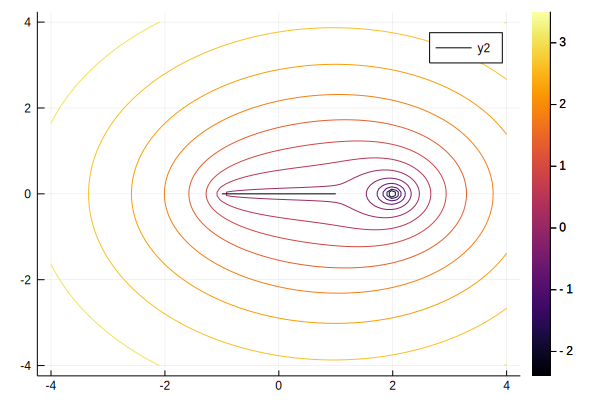

In [8]:
x = Fun()
u = SingularIntegral(0)  \ log(2-x)
v = z -> log(abs(2-z)) - real(logkernel(u, z))
xx = yy = linspace(-4.,4., 100)
V = v.(xx' .+ im*yy)

contour(xx, yy, V)
plot!(domain(x); color=:black)

We will see how this can be solved explicitely in the next problem sheet.